### Opencv简单操作


In [5]:
#我们会用4.4版本的opencv
import cv2
print(cv2.__version__)

4.4.0


In [6]:
# 读取image
image = cv2.imread('test.jpg')

#python中的image数据为三维数组, 为长，宽，channel，一般情况下第三维度的3是rgb value
display(image.shape)
image

(253, 199, 3)

array([[[ 10,  11,   0],
        [ 79,  72,  55],
        [172, 147, 167],
        ...,
        [ 59, 102, 123],
        [ 57, 100, 121],
        [ 66, 107, 129]],

       [[ 12,  11,   0],
        [ 30,  21,  12],
        [123,  96, 122],
        ...,
        [ 58, 101, 122],
        [ 57, 100, 121],
        [ 66, 107, 129]],

       [[ 21,  15,   4],
        [ 11,   0,   3],
        [ 77,  45,  86],
        ...,
        [ 58, 101, 122],
        [ 57, 100, 121],
        [ 66, 107, 129]],

       ...,

       [[  4,   2,   2],
        [  4,   2,   2],
        [  3,   1,   1],
        ...,
        [ 10,   8,   8],
        [ 10,   8,   8],
        [ 11,   9,   9]],

       [[  4,   2,   2],
        [  4,   2,   2],
        [  3,   1,   1],
        ...,
        [ 10,   8,   8],
        [ 10,   8,   8],
        [ 11,   9,   9]],

       [[  4,   2,   2],
        [  4,   2,   2],
        [  3,   1,   1],
        ...,
        [ 10,   8,   8],
        [ 10,   8,   8],
        [ 11,   9,   9]]

In [7]:
# 读取后默认储存是bgr 不是rgb， which只是rgb的reverse反过来了，所以如果查看这个image会出现bgr的情况
import matplotlib.pyplot as plt
plt.imshow(image)

(-0.5, 198.5, 252.5, -0.5)

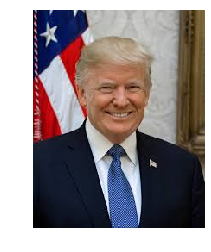

In [8]:
# 解决方式很简单，把dimension 3 reverse一下就好了
plt.imshow(image[:, :, ::-1])

plt.axis('off') # 撤销坐标轴

(-0.5, 198.5, 252.5, -0.5)

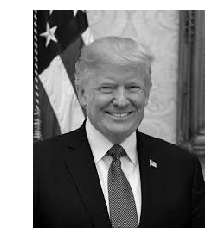

In [9]:
# 图像的灰度转化
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray') # 这里cmap需要标注gray，不然会出现很奇怪的图像，具体原因简单概括是matplotlib自带的pixel value值对应
#的颜色不是黑白灰，所以需要标注cmap，不是很重要的细节，但是有兴趣的可以自己探索，试试其他的cmap
plt.axis('off')

### 人脸特征点提取

(-0.5, 198.5, 252.5, -0.5)

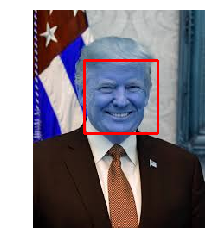

In [16]:
# 虽然听上去很高大上，但是opencv已有自带的人脸特征点提取函数，运用起来十分方便简单
# 算法原理和源码感兴趣的可以私聊, 或者看这两个链接https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
# https://medium.com/@soumyapatilblogs/face-and-eyes-detection-using-opencv-9fcad47656a4


# 各个detection的xml file可以从https://github.com/anaustinbeing/haar-cascade-files下载,在haar文件夹里也有

face_cascade = cv2.CascadeClassifier('haar/haarcascade_frontalface_default.xml') # load classifier
faces = face_cascade.detectMultiScale(gray, 1.1, 4) 
# 用classifier识别， documentation：https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php
# documentation https://docs.opencv.org/3.4/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498
# return一个正方形的左上放的点，和宽和长

#根据数据画出检测到的人脸
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(image)
plt.axis('off')

### 人脸特征点提取

我们将会用两种library实现特征点提取



1.opencv
https://medium.com/analytics-vidhya/facial-landmarks-and-face-detection-in-python-with-opencv-73979391f30e

如果是用4.4.2的opencv会提示cv2.cv2.face不存在，如果想要使用这个教程里的方法，需要把opencv降回4.1.2并且安装opencv-contrib-python

2.dlib
https://towardsdatascience.com/detecting-face-features-with-python-30385aee4a8e

这个notebook只会演示dlib的码

In [ ]:
#!conda install -c conda-forge

模型文件可以从这里下载https://github.com/italojs/facial-landmarks-recognition

演示中用的shape_predictor_68_face_landmarks.dat已在当前dir中

In [3]:
import dlib
detector = dlib.get_frontal_face_detector() #跟opencv的haar作用一样，用来检测人脸
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") # 创立predictor 并且 load已经训练好的参数
# documentation http://dlib.net/python/index.html#dlib.shape_predictor

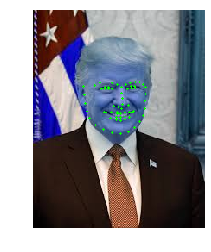

In [24]:
image = cv2.imread('test.jpg') #读取图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #转成灰度文件
faces = detector(gray) #这里之所以用dlib的而不是opencv之前的haar是因为predictor需要一个box参数，这个参数的数据类型是dlib自定义的
#为了方便所以用dlib的face detection函数，不过我们也是可以用opencv的，然后在转化
landmarks = predictor(image=gray, box=faces[0]) #传入模型得到结果
x = landmarks.part(27).x
y = landmarks.part(27).y
# 画出所有特征点
for n in range(0, 68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    cv2.circle(img=image, center=(x, y), radius=1, color=(0, 255, 0), thickness=-1)
plt.axis('off')
plt.imshow(image)

### 在我们这次的proj中，我们关注的是这68个特征点中的眼睛的特征点，模型思路大概是实时计算上下眼睑的pixel距离，设立阈值来监控疲劳值